<a href="https://colab.research.google.com/github/rtajeong/Kyungnam_univ_M4/blob/main/lab_91_simple_rnn_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network (RNN)
- from https://github.com/gilbutITbook/006975

- SimpleRNN: 
  - SimpleRNN이 한 가지 다른 점은 넘파이 예제처럼 하나의 시퀀스가 아니라 다른 케라스 층과 마찬가지로 시퀀스 배치를 처리한다는 것입니다. 즉, (timesteps, input_features) 크기가 아니라 (batch_size, timesteps, input_features) 크기의 입력을 받습니다.
  - 케라스에 있는 모든 순환 층과 동일하게 SimpleRNN은 두 가지 모드로 실행할 수 있습니다. 각 타임스텝의 출력을 모은 전체 시퀀스를 반환하거나(크기가 (batch_size, timesteps, output_features)인 3D 텐서), 입력 시퀀스에 대한 마지막 출력만 반환할 수 있습니다(크기가 (batch_size, output_features)인 2D 텐서). 이 모드는 객체를 생성할 때 return_sequences 매개변수로 선택할 수 있습니다. 

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32, input_length=20))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 32)            320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# embedding(in_dim, out_dim): 10000 * 32 = 320000
# simpleRNN: (32 + 32)*32 + 32 = 2080

In [4]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=20))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 32)            320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 20, 32)            2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환 층을 차례대로 쌓는 것이 유용할 때가 있다. 이런 설정에서는 중간 층들이 전체 출력 시퀀스를 반환하도록 설정해야 한다:

In [5]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=20))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # 맨 위 층만 마지막 출력을 반환합니다.
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 32)            320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 20, 32)            2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 20, 32)            2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 20, 32)            2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


- IMDB 영화 리뷰 문제에 적용

In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수(가장 빈번한 max_features 개의 단어만 사용)
maxlen = 500  # 사용할 텍스트의 길이
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [8]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 55s 333ms/step - loss: 0.6516 - acc: 0.5997 - val_loss: 0.5365 - val_acc: 0.7436
Epoch 2/10
157/157 [==============================] - 52s 330ms/step - loss: 0.3965 - acc: 0.8372 - val_loss: 0.3609 - val_acc: 0.8512
Epoch 3/10
157/157 [==============================] - 52s 330ms/step - loss: 0.3078 - acc: 0.8767 - val_loss: 0.4597 - val_acc: 0.8026
Epoch 4/10
157/157 [==============================] - 52s 332ms/step - loss: 0.2407 - acc: 0.9076 - val_loss: 0.3423 - val_acc: 0.8702
Epoch 5/10
157/157 [==============================] - 52s 332ms/step - loss: 0.1696 - acc: 0.9381 - val_loss: 0.5019 - val_acc: 0.7942
Epoch 6/10
157/157 [==============================] - 52s 331ms/step - loss: 0.1129 - acc: 0.9628 - val_loss: 0.4059 - val_acc: 0.8660
Epoch 7/10
157/157 [==============================] - 52s 329ms/step - loss: 0.0687 - acc: 0.9784 - val_loss: 0.4739 - val_acc: 0.8474
Epoch 8/10
157/157 [==============================] - 5

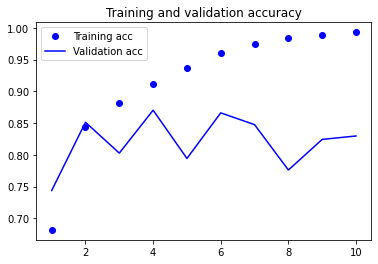

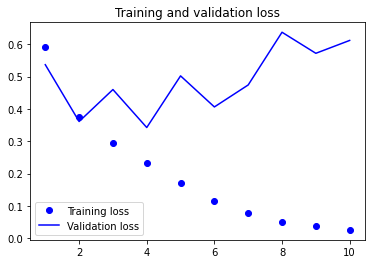

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 안타깝지만 간단한 순환 네트워크는 이 기준 모델보다 성능이 높지 않습니다(85% 정도의 검증 정확도를 얻었습니다). 이런 원인은 전체 시퀀스가 아니라 처음 500개의 단어만 입력에 사용했기 때문입니다. 이 RNN은 기준 모델보다 얻은 정보가 적습니다. 다른 이유는 SimpleRNN이 텍스트와 같이 긴 시퀀스를 처리하는데 적합하지 않기 때문입니다.

# LSTM using Keras

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 57s 365ms/step - loss: 0.5072 - acc: 0.7599 - val_loss: 0.3533 - val_acc: 0.8596
Epoch 2/10
157/157 [==============================] - 57s 361ms/step - loss: 0.2885 - acc: 0.8871 - val_loss: 0.3704 - val_acc: 0.8380
Epoch 3/10
157/157 [==============================] - 57s 362ms/step - loss: 0.2281 - acc: 0.9131 - val_loss: 0.4037 - val_acc: 0.8696
Epoch 4/10
157/157 [==============================] - 56s 355ms/step - loss: 0.1972 - acc: 0.9269 - val_loss: 0.3341 - val_acc: 0.8590
Epoch 5/10
157/157 [==============================] - 55s 353ms/step - loss: 0.1756 - acc: 0.9356 - val_loss: 0.3370 - val_acc: 0.8492
Epoch 6/10
157/157 [==============================] - 57s 365ms/step - loss: 0.1583 - acc: 0.9435 - val_loss: 0.3431 - val_acc: 0.8540
Epoch 7/10
157/157 [==============================] - 61s 390ms/step - loss: 0.1419 - acc: 0.9498 - val_loss: 0.3563 - val_acc: 0.8874
Epoch 8/10
157/157 [==============================] - 5

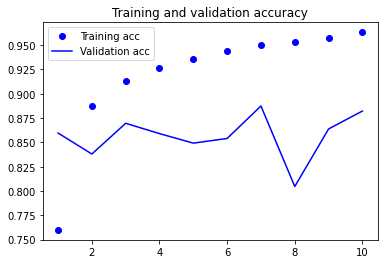

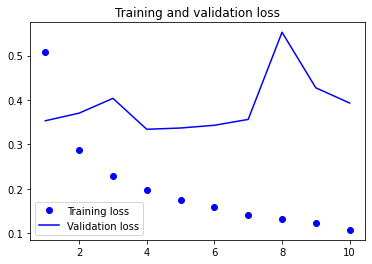

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Exercise (연습)

In [ ]:
# Keras preprocessing
# - Embedding()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
t  = Tokenizer()
text = "The earth is an awesome place to live"
t.fit_on_texts([text])


In [ ]:
test_text = "The earth is an great place to live"
sequences = t.texts_to_sequences([test_text])[0]

print("sequences : ",sequences) # great는 단어 집합(vocabulary)에 없으므로 출력되지 않는다.
print("word_index : ",t.word_index) # 단어 집합(vocabulary) 출력

sequences :  [1, 2, 3, 4, 6, 7, 8]
word_index :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'to': 7, 'live': 8}


In [ ]:
# Keras preprocessing
# - Word Embedding(): convert words -> dense vectors
# - Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 
#   이 때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스입니다. Embedding()은 워드 임베딩 
#   작업을 수행하고 (number of samples, input_length, embedding word dimensionality)인 3D 텐서를 
#   리턴합니다.

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
import numpy as np

inputs1 = Input(shape=(3, 1))   # (batch_size, timesteps, input_features)
lstm1 = LSTM(1)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
data = np.array([0.1, 0.2, 0.3]).reshape((1,3,1))
print(model.predict(data))   

[[-0.08360424]]


In [ ]:

inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1, return_sequences=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
print(model.predict(data))   # one hidden state output for each input time step

[[[-0.02241635]
  [-0.06170981]
  [-0.11444511]]]
